##  Exploratory Data Analysis (EDA)

### Importing Libraries

In [1]:
# Import libraries for data exploration and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For notebook display
%matplotlib inline

### Loading the Dataset

In [2]:
# Load the dataset (update path if needed)
import os
csv_path = '../data/raw/LC_loans_granting_model_dataset.csv'
if not os.path.exists(csv_path):
    # try alternative path (when running from repo root)
    csv_path = 'data/raw/LC_loans_granting_model_dataset.csv'

print('Using file:', csv_path)
df = pd.read_csv(csv_path)
df.head()

Using file: ../data/raw/LC_loans_granting_model_dataset.csv


,id,issue_d,revenue,dti_n,loan_amnt,fico_n,experience_c,emp_length,purpose,home_ownership_n,addr_state,zip_code,Default,title,desc
0,68407277,Dec-15,55000.0,5.91,3600,677.0,1,10+ years,debt_consolidation,MORTGAGE,PA,190xx,0,Debt consolidation,NaN
1,68355089,Dec-15,65000.0,16.06,24700,717.0,1,10+ years,small_business,MORTGAGE,SD,577xx,0,Business,NaN
2,68341763,Dec-15,71000.0,13.85,20000,697.0,1,10+ years,home_improvement,MORTGAGE,IL,605xx,0,NaN,NaN
3,68476807,Dec-15,104433.0,25.37,10400,697.0,1,3 years,major_purchase,MORTGAGE,PA,174xx,0,Major purchase,NaN
4,68426831,Dec-15,34000.0,10.20,11950,692.0,1,4 years,debt_consolidation,RENT,GA,300xx,0,Debt consolidation,NaN


In [3]:
# 1. Inspect dataset: shape, dtypes, missing values, basic stats
print('Shape:', df.shape)
print('\nData types:')
print(df.dtypes)
print('\nMissing values:')
print(df.isnull().sum().sort_values(ascending=False).head(20))

# Basic descriptive statistics
print('\nDescriptive stats for numerical columns:\n')
print(df.describe().T)

# Show memory usage
print('\nMemory usage:')
print(df.memory_usage(deep=True))

# Display first and last few rows
print('\nFirst 5 rows:')
print(df.head())
print('\nLast 5 rows:')
print(df.tail())

Shape: (1048575, 15)

Data types:
id                    int64
issue_d              object
revenue             float64
dti_n               float64
loan_amnt             int64
fico_n              float64
experience_c          int64
emp_length           object
purpose              object
home_ownership_n     object
addr_state           object
zip_code             object
Default               int64
title                object
desc                 object
dtype: object

Missing values:
desc                997510
title                13369
zip_code                 1
id                       0
issue_d                  0
revenue                  0
dti_n                    0
loan_amnt                0
fico_n                   0
experience_c             0
emp_length               0
purpose                  0
home_ownership_n         0
addr_state               0
Default                  0
dtype: int64

Descriptive stats for numerical columns:

                  count          mean           std   

Target Variable Distribution:
Default
0    839415
1    209160
Name: count, dtype: int64

Target Variable Proportions:
Default
0    0.800529
1    0.199471
Name: proportion, dtype: float64


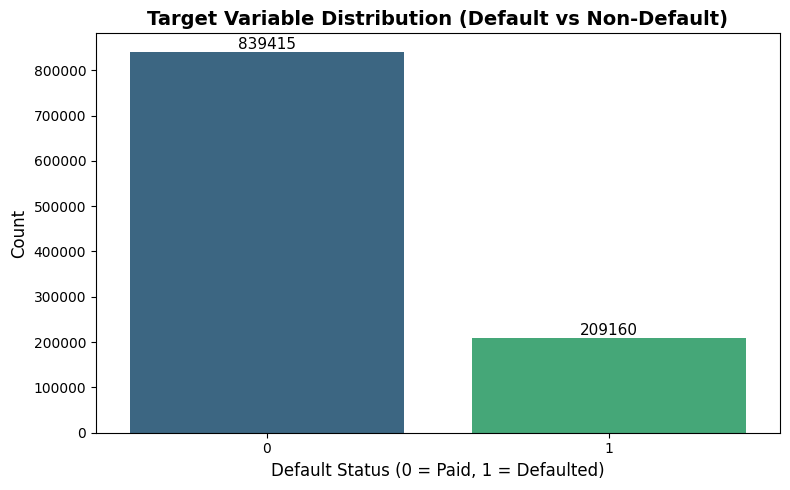


Class Imbalance Ratio (Non-Default:Default): 4.01:1
⚠️  Significant class imbalance detected - consider SMOTE or class weights in modeling


In [4]:
# 2. Target variable distribution
# The target column is 'Default' (1 = defaulted, 0 = paid)
target_col = 'Default'
print("Target Variable Distribution:")
print(df[target_col].value_counts())
print("\nTarget Variable Proportions:")
print(df[target_col].value_counts(normalize=True))

plt.figure(figsize=(8,5))
ax = sns.countplot(x=target_col, data=df, palette='viridis')
plt.title('Target Variable Distribution (Default vs Non-Default)', fontsize=14, fontweight='bold')
plt.xlabel('Default Status (0 = Paid, 1 = Defaulted)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig('../results/figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Check class imbalance ratio
class_counts = df[target_col].value_counts()
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"\nClass Imbalance Ratio (Non-Default:Default): {imbalance_ratio:.2f}:1")
if imbalance_ratio > 3:
    print("⚠️  Significant class imbalance detected - consider SMOTE or class weights in modeling")

Numerical columns (5): ['revenue', 'dti_n', 'loan_amnt', 'fico_n', 'experience_c']


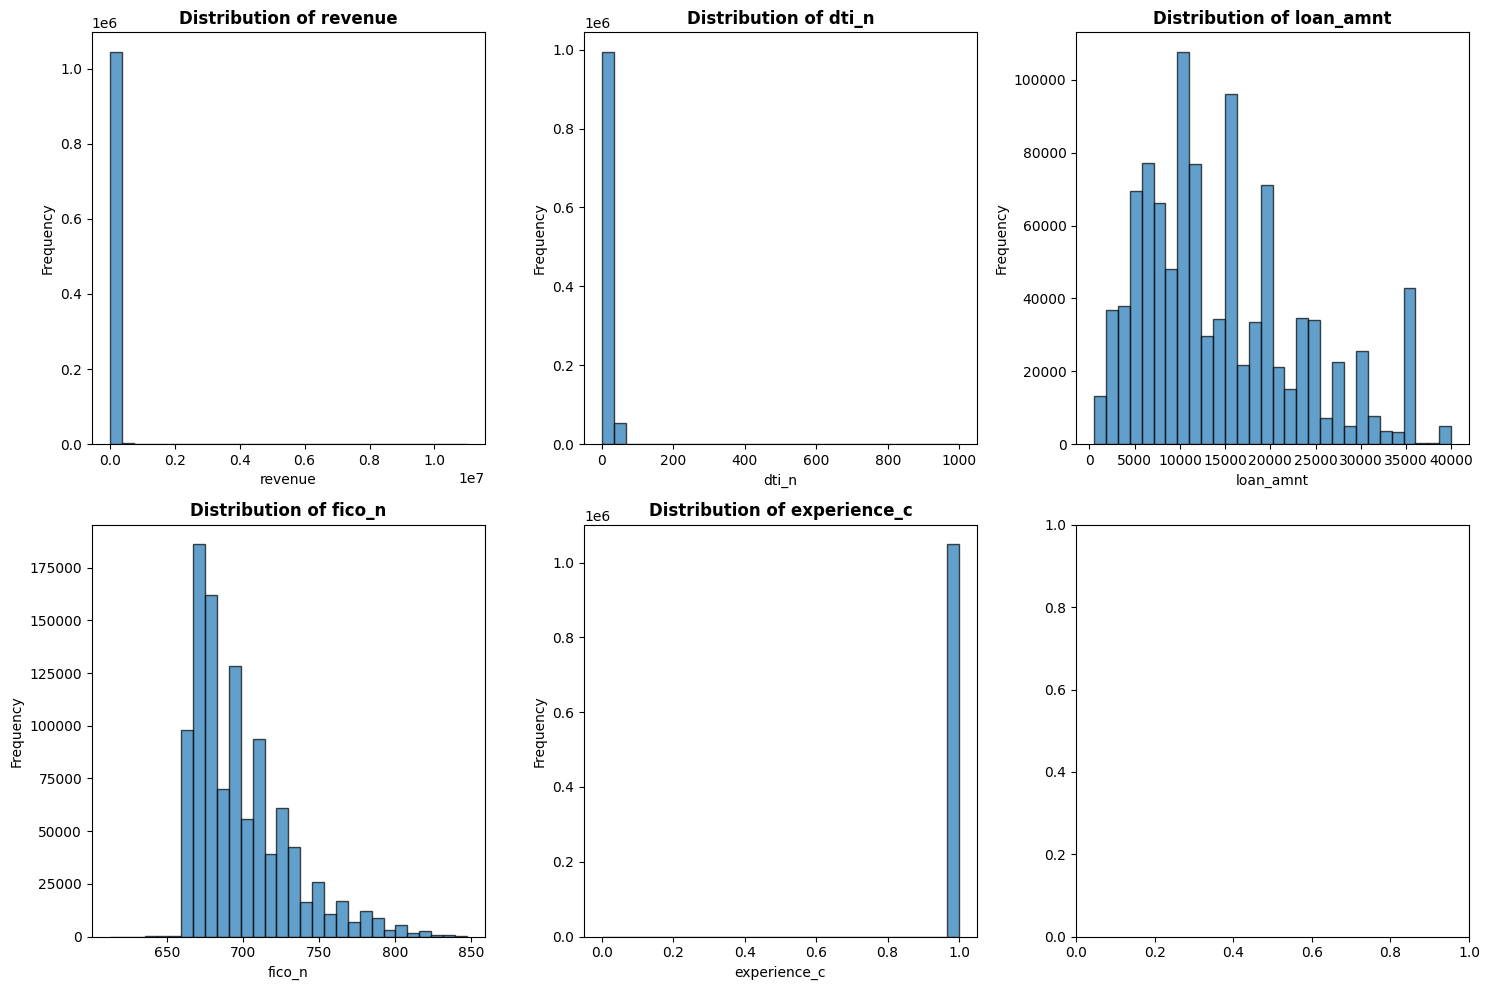

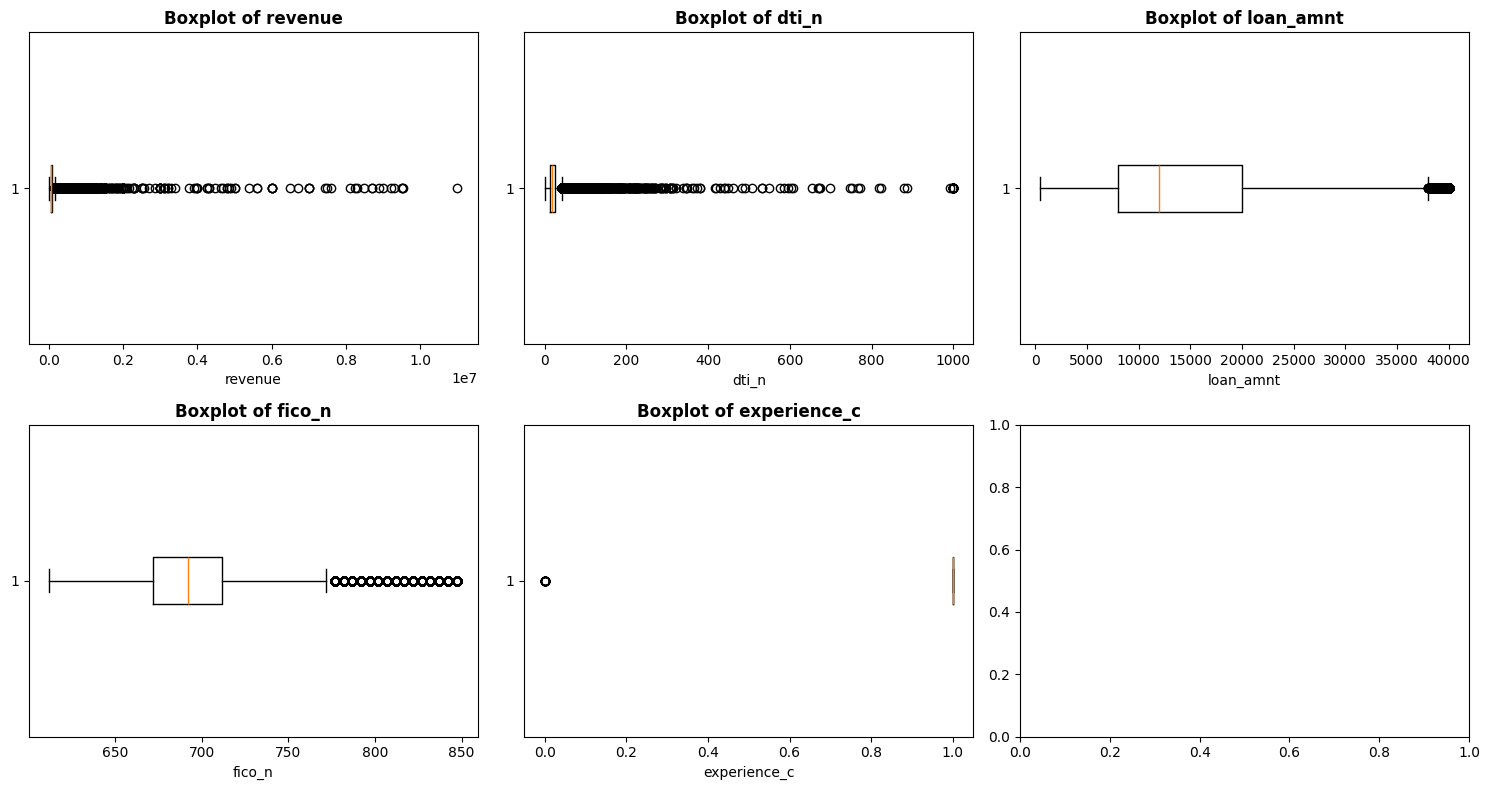

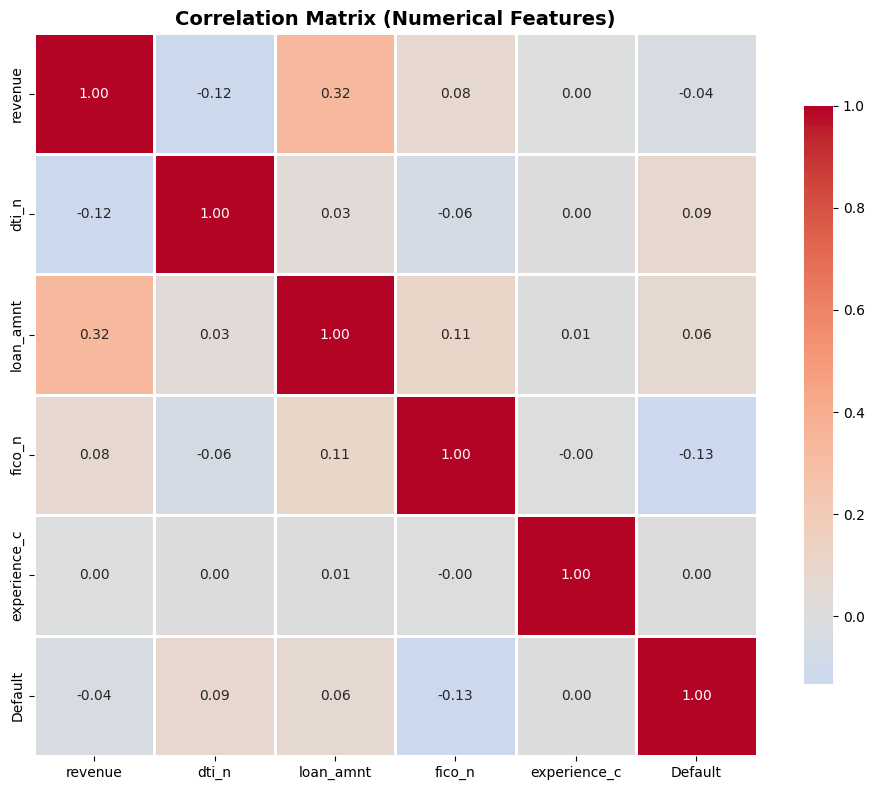


Top correlations with Default:
dti_n           0.087419
loan_amnt       0.064144
experience_c    0.000971
revenue        -0.041267
fico_n         -0.131938
Name: Default, dtype: float64


In [5]:
# 3. Feature analysis: numerical distributions and correlation
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove ID and target from numerical analysis
num_cols = [col for col in num_cols if col not in ['id', 'Default']]
print(f'Numerical columns ({len(num_cols)}): {num_cols}')

if len(num_cols) > 0:
    # Distribution plots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, col in enumerate(num_cols):
        if idx < 6:
            axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('../results/figures/numerical_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Boxplots for outlier detection
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.ravel()
    
    for idx, col in enumerate(num_cols):
        if idx < 6:
            axes[idx].boxplot(df[col].dropna(), vert=False)
            axes[idx].set_title(f'Boxplot of {col}', fontweight='bold')
            axes[idx].set_xlabel(col)
    
    plt.tight_layout()
    plt.savefig('../results/figures/outlier_boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[num_cols + ['Default']].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix (Numerical Features)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('../results/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Show top correlations with target
    target_correlations = correlation_matrix['Default'].drop('Default').sort_values(ascending=False)
    print("\nTop correlations with Default:")
    print(target_correlations)
else:
    print('No numerical columns found.')

Categorical columns (6): ['issue_d', 'emp_length', 'purpose', 'home_ownership_n', 'addr_state', 'zip_code']

Feature: purpose
purpose
debt_consolidation    606338
credit_card           235274
home_improvement       68084
other                  59464
major_purchase         22666
medical                12239
small_business         11553
car                    11161
moving                  7381
vacation                7048
house                   5216
wedding                 1028
renewable_energy         700
educational              423
Name: count, dtype: int64
Unique values: 14
Missing values: 0 (0.00%)


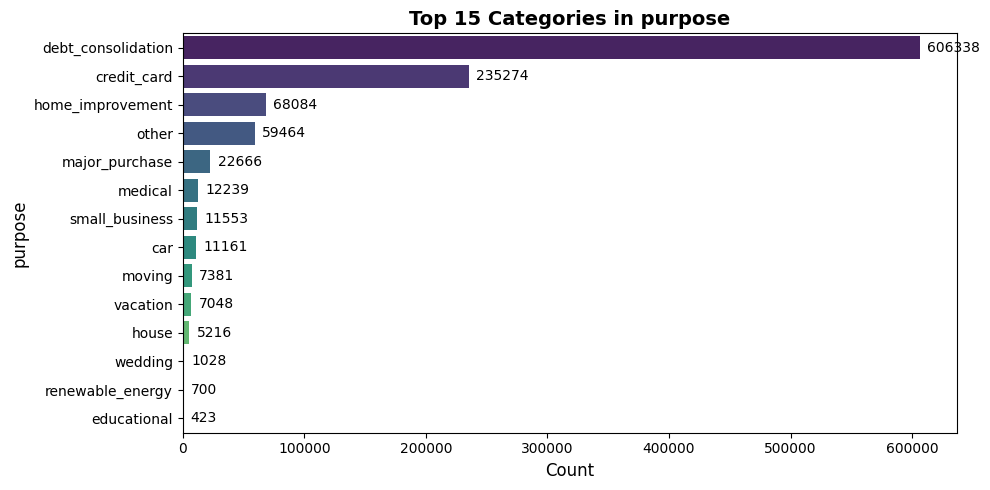


Feature: emp_length
emp_length
10+ years    344528
2 years       95121
< 1 year      85874
3 years       84858
1 year        69408
5 years       63290
4 years       62715
NI            62248
8 years       48224
6 years       46457
7 years       45974
9 years       39878
Name: count, dtype: int64
Unique values: 12
Missing values: 0 (0.00%)


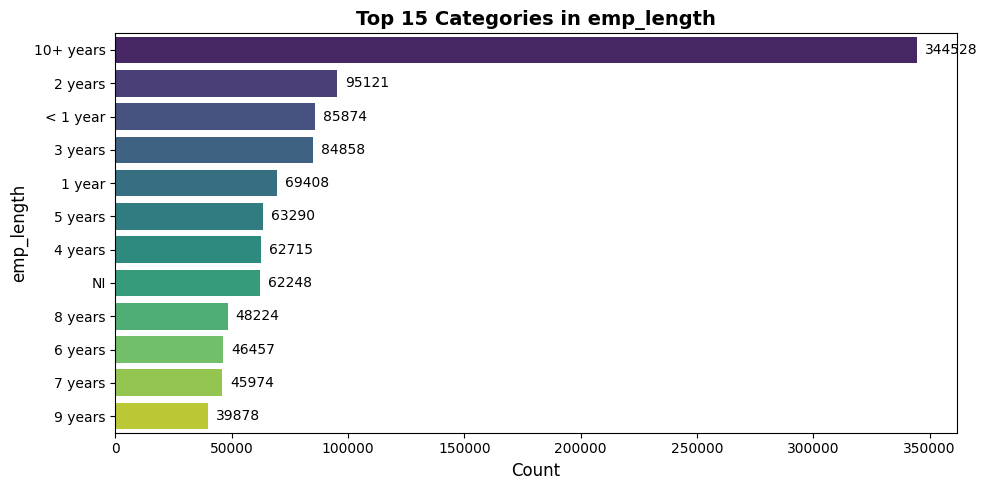


Feature: home_ownership_n
home_ownership_n
MORTGAGE    517417
RENT        416229
OWN         114563
OTHER          366
Name: count, dtype: int64
Unique values: 4
Missing values: 0 (0.00%)


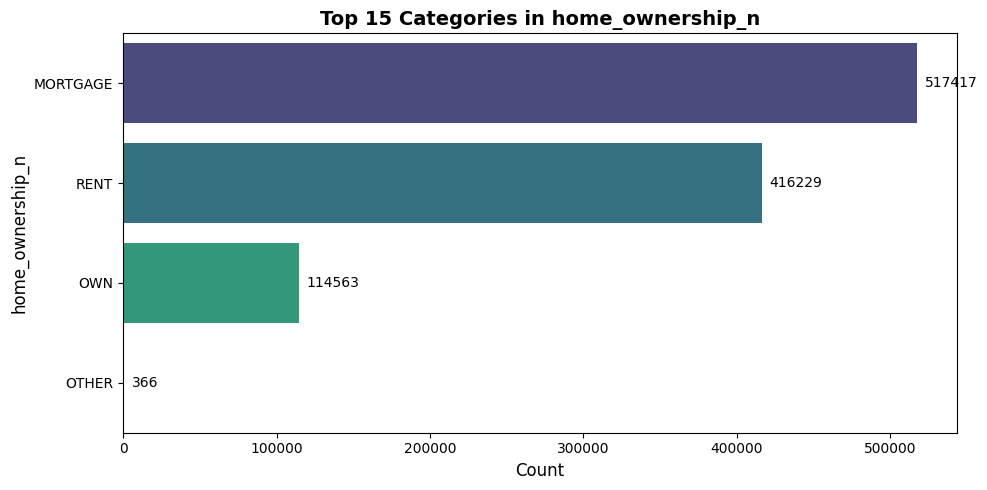


Feature: addr_state
addr_state
CA    150691
TX     85957
NY     85046
FL     74050
IL     40687
NJ     37702
PA     35614
OH     34558
GA     34062
VA     29755
NC     29282
MI     27794
AZ     25278
MD     24388
MA     24097
Name: count, dtype: int64
Unique values: 51
Missing values: 0 (0.00%)


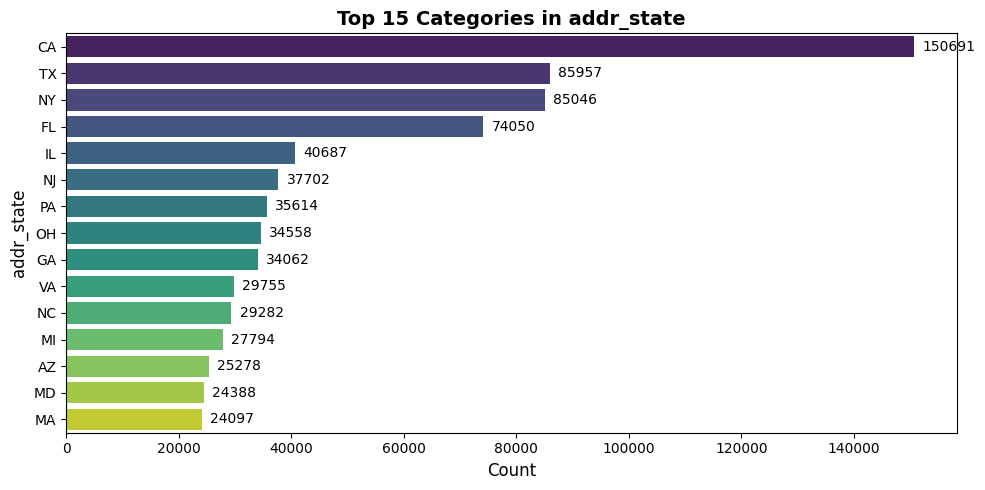


Default Rates by Categorical Features

Default Rate by purpose (Top 10):
purpose
small_business        0.295421
moving                0.238857
renewable_energy      0.235714
house                 0.222584
medical               0.216439
debt_consolidation    0.211897
educational           0.208038
other                 0.207251
vacation              0.190692
major_purchase        0.185255
Name: Default, dtype: float64


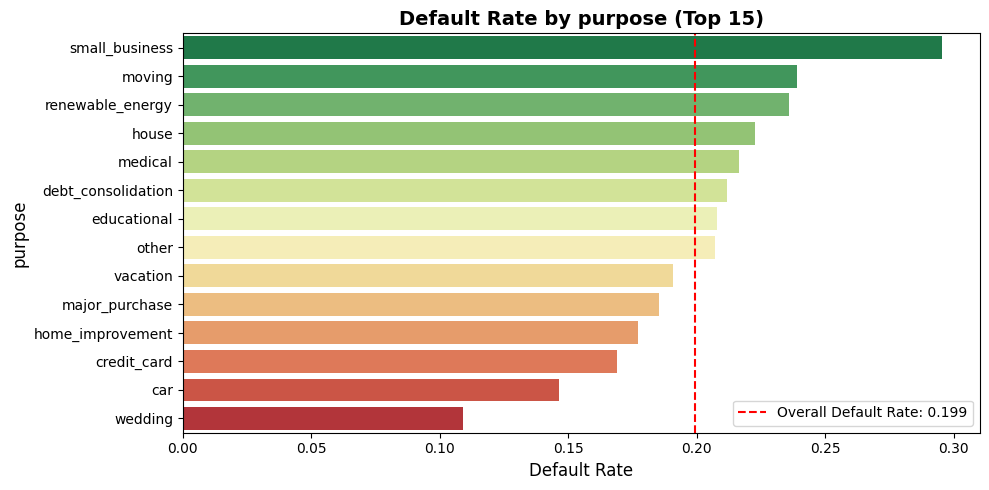


Default Rate by emp_length (Top 10):
emp_length
NI          0.265583
1 year      0.206619
< 1 year    0.203379
8 years     0.200398
9 years     0.200336
3 years     0.199215
2 years     0.198127
4 years     0.197672
5 years     0.197298
7 years     0.196437
Name: Default, dtype: float64


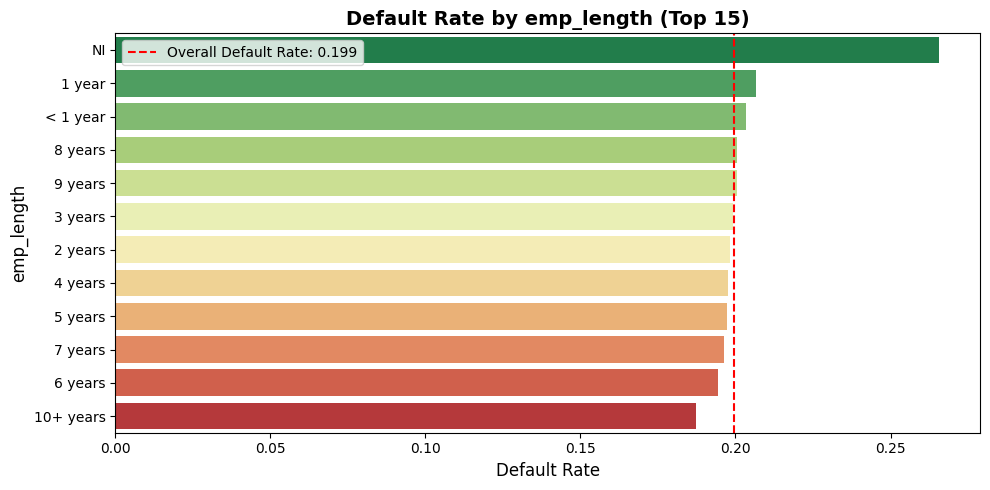


Default Rate by home_ownership_n (Top 10):
home_ownership_n
RENT        0.232593
OWN         0.204412
OTHER       0.191257
MORTGAGE    0.171738
Name: Default, dtype: float64


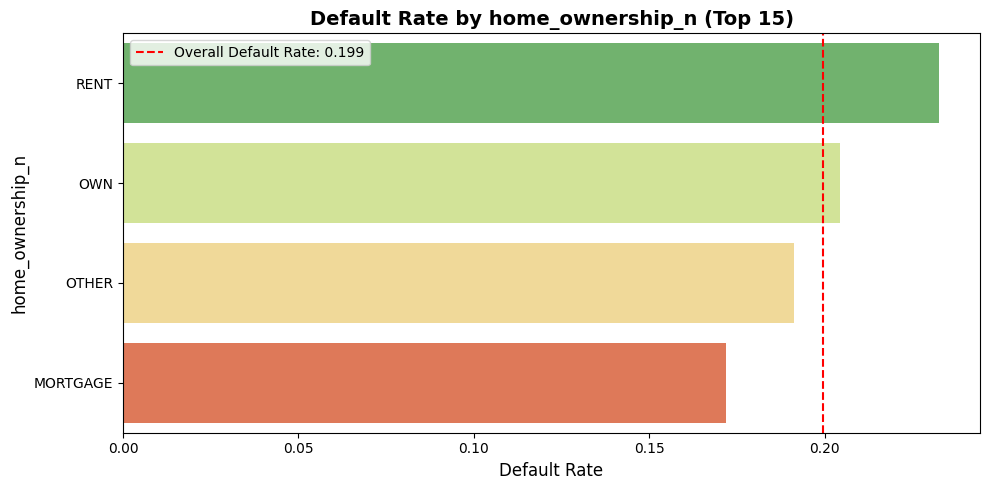


Default Rate by addr_state (Top 10):
addr_state
MS    0.256487
NE    0.250177
AR    0.243274
AL    0.237721
OK    0.236875
LA    0.231004
SD    0.224338
NY    0.220046
NV    0.219057
NM    0.217079
Name: Default, dtype: float64


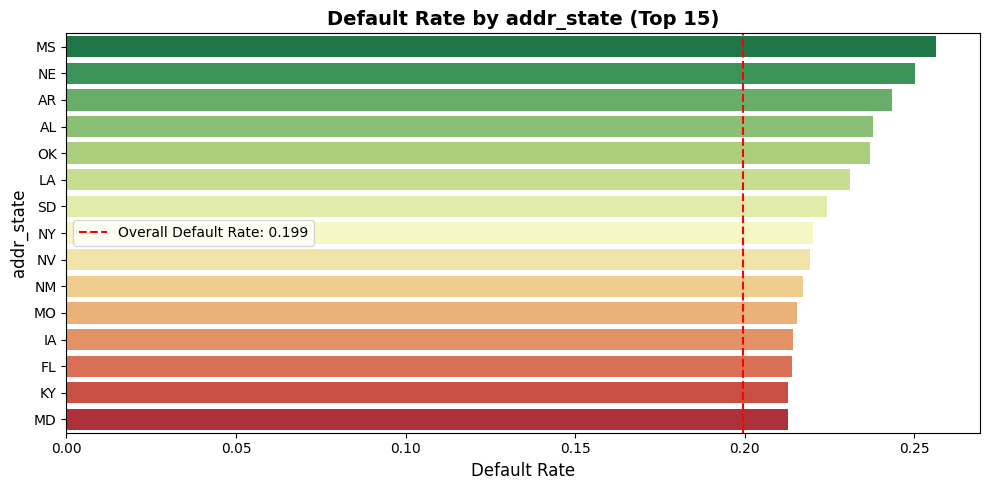

In [6]:
# 4. Categorical feature analysis and bias checks
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Exclude ID-like columns
cat_cols = [col for col in cat_cols if col not in ['id', 'title', 'desc']]
print(f'Categorical columns ({len(cat_cols)}): {cat_cols}')

# Analyze key categorical features
key_cats = ['purpose', 'emp_length', 'home_ownership_n', 'addr_state']
key_cats = [col for col in key_cats if col in df.columns]

for col in key_cats:
    print(f'\n{"="*60}')
    print(f'Feature: {col}')
    print(f'{"="*60}')
    print(df[col].value_counts().head(15))
    print(f'Unique values: {df[col].nunique()}')
    print(f'Missing values: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.2f}%)')
    
    # Plot top categories
    plt.figure(figsize=(10, 5))
    top_categories = df[col].value_counts().head(15)
    ax = sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
    plt.title(f'Top 15 Categories in {col}', fontsize=14, fontweight='bold')
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    # Add count labels
    for i, v in enumerate(top_categories.values):
        ax.text(v + 0.01 * max(top_categories.values), i, str(v), 
                va='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f'../results/figures/categorical_{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Default rate by categorical feature
print(f'\n{"="*60}')
print('Default Rates by Categorical Features')
print(f'{"="*60}')

for col in key_cats:
    if col in df.columns:
        default_rate = df.groupby(col)['Default'].mean().sort_values(ascending=False)
        print(f'\nDefault Rate by {col} (Top 10):')
        print(default_rate.head(10))
        
        # Plot default rate
        plt.figure(figsize=(10, 5))
        top_cats = default_rate.head(15)
        ax = sns.barplot(x=top_cats.values, y=top_cats.index, palette='RdYlGn_r')
        plt.title(f'Default Rate by {col} (Top 15)', fontsize=14, fontweight='bold')
        plt.xlabel('Default Rate', fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.axvline(x=df['Default'].mean(), color='red', linestyle='--', 
                   label=f'Overall Default Rate: {df["Default"].mean():.3f}')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'../results/figures/default_rate_{col}.png', dpi=300, bbox_inches='tight')
        plt.show()

Missing Values Analysis
      Column  Missing_Count  Missing_Percentage
14      desc         997510           95.130057
13     title          13369            1.274968
11  zip_code              1            0.000095
      Column  Missing_Count  Missing_Percentage
14      desc         997510           95.130057
13     title          13369            1.274968
11  zip_code              1            0.000095


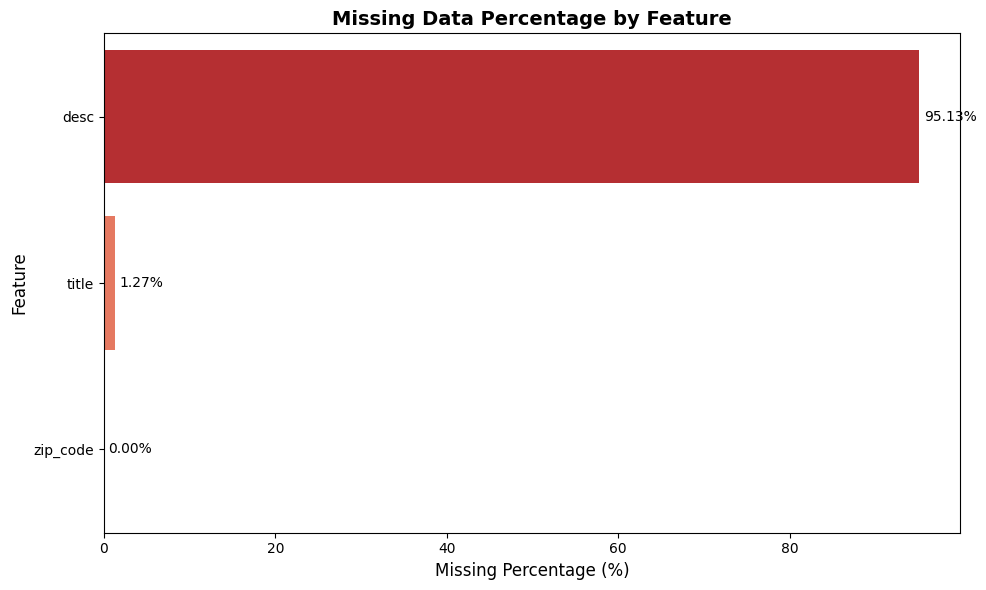


Data Quality Summary
Total samples: 1,048,575
Total features: 15
Numerical features: 6
Categorical features: 6
Categorical features: 6
Duplicate rows: 0
Memory usage: 502.48 MB
Duplicate rows: 0
Memory usage: 502.48 MB


In [7]:
# 5. Missing values analysis
print("Missing Values Analysis")
print("="*60)
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data)

# Visualize missing data
if len(missing_data) > 0:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Missing_Percentage', y='Column', data=missing_data, palette='Reds_r')
    plt.title('Missing Data Percentage by Feature', fontsize=14, fontweight='bold')
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    
    # Add percentage labels
    for i, v in enumerate(missing_data['Missing_Percentage'].values):
        ax.text(v + 0.5, i, f'{v:.2f}%', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('../results/figures/missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No missing values found in the dataset!")

# Data quality summary
print("\n" + "="*60)
print("Data Quality Summary")
print("="*60)
print(f"Total samples: {len(df):,}")
print(f"Total features: {len(df.columns)}")
print(f"Numerical features: {len([col for col in df.select_dtypes(include=[np.number]).columns if col not in ['id']])}")
print(f"Categorical features: {len([col for col in df.select_dtypes(include=['object']).columns if col not in ['id', 'title', 'desc']])}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

In [8]:
# 6. Feature engineering ideas based on EDA
print("Potential Feature Engineering Ideas")
print("="*60)

# Check existing features that could be engineered
feature_ideas = []

if 'revenue' in df.columns and 'loan_amnt' in df.columns:
    feature_ideas.append("• loan_to_income_ratio = loan_amnt / revenue")
    
if 'dti_n' in df.columns:
    feature_ideas.append("• High DTI indicator (dti_n > 36%)")
    
if 'fico_n' in df.columns:
    feature_ideas.append("• FICO score bins (Poor: <580, Fair: 580-669, Good: 670-739, Excellent: 740+)")
    
if 'emp_length' in df.columns:
    feature_ideas.append("• Employment stability score from emp_length")
    
if 'experience_c' in df.columns:
    feature_ideas.append("• Experience level indicators")

feature_ideas.append("• State-level default rate encoding")
feature_ideas.append("• Purpose-based risk categories")
feature_ideas.append("• Interaction features (fico × dti, income × loan_amount)")

print("\nRecommended engineered features:")
for idea in feature_ideas:
    print(idea)

print("\n" + "="*60)
print("Key Insights Summary")
print("="*60)
print("\n1. TARGET VARIABLE:")
print(f"   - Default rate: {df['Default'].mean()*100:.2f}%")
print(f"   - Class imbalance: {df['Default'].value_counts()[0] / df['Default'].value_counts()[1]:.2f}:1")

print("\n2. DATA QUALITY:")
print(f"   - Dataset size: {len(df):,} samples")
print(f"   - Missing values present in {len(missing_data)} features")
print(f"   - No duplicate rows" if df.duplicated().sum() == 0 else f"   - {df.duplicated().sum()} duplicate rows found")

print("\n3. KEY PATTERNS:")
if 'fico_n' in df.columns:
    print(f"   - Average FICO score: {df['fico_n'].mean():.0f}")
if 'dti_n' in df.columns:
    print(f"   - Average DTI: {df['dti_n'].mean():.2f}%")
if 'loan_amnt' in df.columns:
    print(f"   - Average loan amount: ${df['loan_amnt'].mean():,.0f}")

print("\n4. PREPROCESSING REQUIREMENTS:")
print("   - Handle missing values in 'desc', 'title' columns")
print("   - Encode categorical variables (purpose, emp_length, home_ownership, state)")
print("   - Scale numerical features (revenue, loan_amnt, fico, dti)")
print("   - Address class imbalance (consider SMOTE or class weights)")
print("   - Feature engineering for improved predictions")

print("\n✅ EDA Complete! Ready for Phase 2: Baseline Model Development")

Potential Feature Engineering Ideas

Recommended engineered features:
• loan_to_income_ratio = loan_amnt / revenue
• High DTI indicator (dti_n > 36%)
• FICO score bins (Poor: <580, Fair: 580-669, Good: 670-739, Excellent: 740+)
• Employment stability score from emp_length
• Experience level indicators
• State-level default rate encoding
• Purpose-based risk categories
• Interaction features (fico × dti, income × loan_amount)

Key Insights Summary

1. TARGET VARIABLE:
   - Default rate: 19.95%
   - Class imbalance: 4.01:1

2. DATA QUALITY:
   - Dataset size: 1,048,575 samples
   - Missing values present in 3 features
   - No duplicate rows

3. KEY PATTERNS:
   - Average FICO score: 698
   - Average DTI: 18.45%
   - Average loan amount: $14,469

4. PREPROCESSING REQUIREMENTS:
   - Handle missing values in 'desc', 'title' columns
   - Encode categorical variables (purpose, emp_length, home_ownership, state)
   - Scale numerical features (revenue, loan_amnt, fico, dti)
   - Address class i